In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import cumtrapz

(6.365918204337788, 0.5866960425245484)
(1.6260708350297086, 0.13195487956089516)


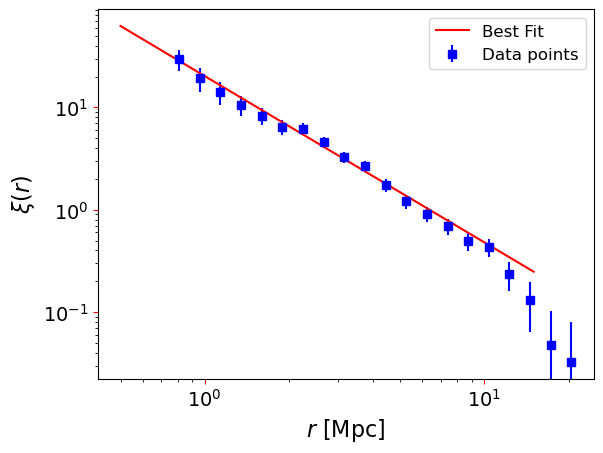

(0.8890261625815832, 0.0668884994678337)
(0.9182502165838963, 0.06934628289751553)
(0.9501200078802488, 0.0721282401364741)


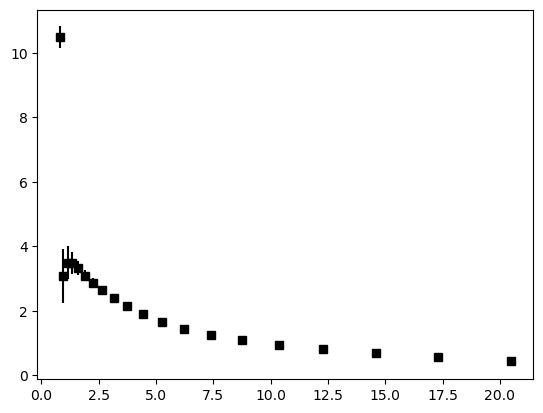

In [29]:
def f_xi(R, r0, ga):
    
    return (r0 / R) ** ga

data = np.genfromtxt('xi.dat', delimiter='\t')

r  = data[:, 0]/0.6727
xi = data[:, 1] 

cov_xi = np.genfromtxt('cov.txt')

xi_r2 = xi * r * r

plt.loglog()
plt.tick_params(labelsize=14,color='red')
plt.xlabel(r'$r$ [Mpc]', fontsize=16)
plt.ylabel(r'$\xi(r)$', fontsize=16)
plt.errorbar(r, xi, np.sqrt(np.diag(cov_xi)), fmt='s', color='blue', label='Data points')


popt, pcov = curve_fit(f_xi, r, xi, sigma=cov_xi)

r0 = popt[0]
ga = popt[1]

E = np.sqrt(np.diag(pcov))

er0 = E[0]
ega = E[1]

print((r0, er0))
print((ga, ega))

w = np.linspace(0.5, 15, 100)

plt.plot(w, f_xi(w,r0, ga), color='red', label='Best Fit')
plt.legend(loc='best', fontsize=12)
plt.savefig('xi_V20_P50.pdf', format='pdf', bbox_inches='tight')

plt.show()

sR = np.sqrt((3. / (r ** 3)) * cumtrapz(xi_r2, x=r, initial=xi_r2[0]))

esR = (0.5 / sR) * np.sqrt(np.diag(cov_xi))

plt.errorbar(r, sR, esR, fmt='s', color='black', label='Data points')

def sig_R(R, r0, ga):
    
    t1 = 3. / (3. - ga)
    t2 = (r0 / R) ** ga
    
    return np.sqrt(t1 * t2)

def erro_sigR(R, r0, ga):
    
    t1 = np.sqrt(3.) * ga * f_xi(R, r0, ga)
    t2 = 2. * (3. - ga) * r0 * np.sqrt(f_xi(R, r0, ga) / (3. - ga))
    
    d1 = t1 / t2
    
    t3 = (f_xi(R, r0, ga) * np.log(r0 / R)) / (3. - ga)
    t4 = f_xi(R, r0, ga) / ((3. - ga) ** 2)
    t5 = 2. * np.sqrt(f_xi(R, r0, ga) / (3. - ga))
 
    d2 = np.sqrt(3.) * ((t3 + t4) / t5)
    
    return np.sqrt(((d1 * er0) ** 2) + ((d2 * ega) ** 2))

x67 = 8. / 0.6727
x70 = 8. / 0.7000
x73 = 8. / 0.7300

sig8_67 = sig_R(x67, popt[0], popt[1])
sig8_70 = sig_R(x70, popt[0], popt[1])
sig8_73 = sig_R(x73, popt[0], popt[1])

esig8_67 = erro_sigR(x67, r0, ga)
esig8_70 = erro_sigR(x70, r0, ga)
esig8_73 = erro_sigR(x73, r0, ga)

print((sig8_67, esig8_67))
print((sig8_70, esig8_70))
print((sig8_73, esig8_73))


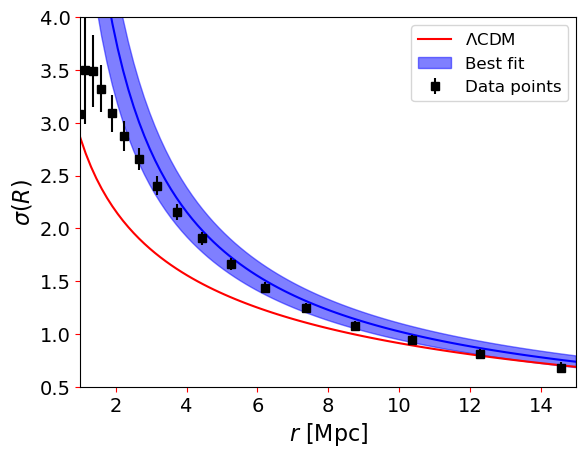

In [30]:
## comparando com o LCDM

import pyccl as ccl

# planck 18 
# h=0.6727 Obh2=0.02236 Ohc2=0.1202 ns=0.9649 As=3.045

cosmo = ccl.Cosmology(Omega_c=0.2656, Omega_b=0.0494,
                          h=0.6727, n_s=0.9649, sigma8=0.8120)

R = np.linspace(0.1, 15, 100)

sigR_LCDM = ccl.sigmaR(cosmo, R, a=1)


plt.xlim(1, 15)
plt.ylim(0.5, 4)
plt.tick_params(labelsize=14,color='red')
plt.xlabel(r'$r$ [Mpc]', fontsize=16)
plt.ylabel(r'$\sigma(R)$', fontsize=16)
plt.plot(R, sigR_LCDM, color='red', label=r'$\Lambda$CDM')
plt.plot(R, sig_R(R, r0, ga), color='blue')
plt.fill_between(R, sig_R(R, r0, ga)-erro_sigR(R, r0, ga), 
                 sig_R(R, r0, ga) + erro_sigR(R, r0, ga), alpha=0.5,
                 color='blue', label='Best fit')
plt.errorbar(r, sR, esR, fmt='s', color='black', label='Data points')

plt.legend(loc='best', fontsize=12)
plt.savefig('sigma_R_V20_P50.pdf', format='pdf', bbox_inches='tight')

In [31]:
sR[16]

0.8106006464648119